<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def getData():
    return pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataframe_exercicio_clusterizacao_RFM.csv")

In [6]:
# Analise dos dados

df = getData()
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    1012 non-null   int64  
 1   rec     1012 non-null   float64
 2   freq    1012 non-null   float64
 3   valor   1012 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.8 KB


In [8]:
df.describe()

,user,rec,freq,valor
count,1012.000000,1012.000000,1012.000000,1012.000000
mean,506.500000,45.064229,4.524704,109.568915
std,292.283538,26.471133,2.423586,125.013542
min,1.000000,1.000000,1.000000,10.859150
25%,253.750000,23.000000,2.000000,57.097928
50%,506.500000,45.000000,5.000000,103.561817
75%,759.250000,68.000000,7.000000,152.704398
max,1012.000000,118.000000,17.000000,3241.824119


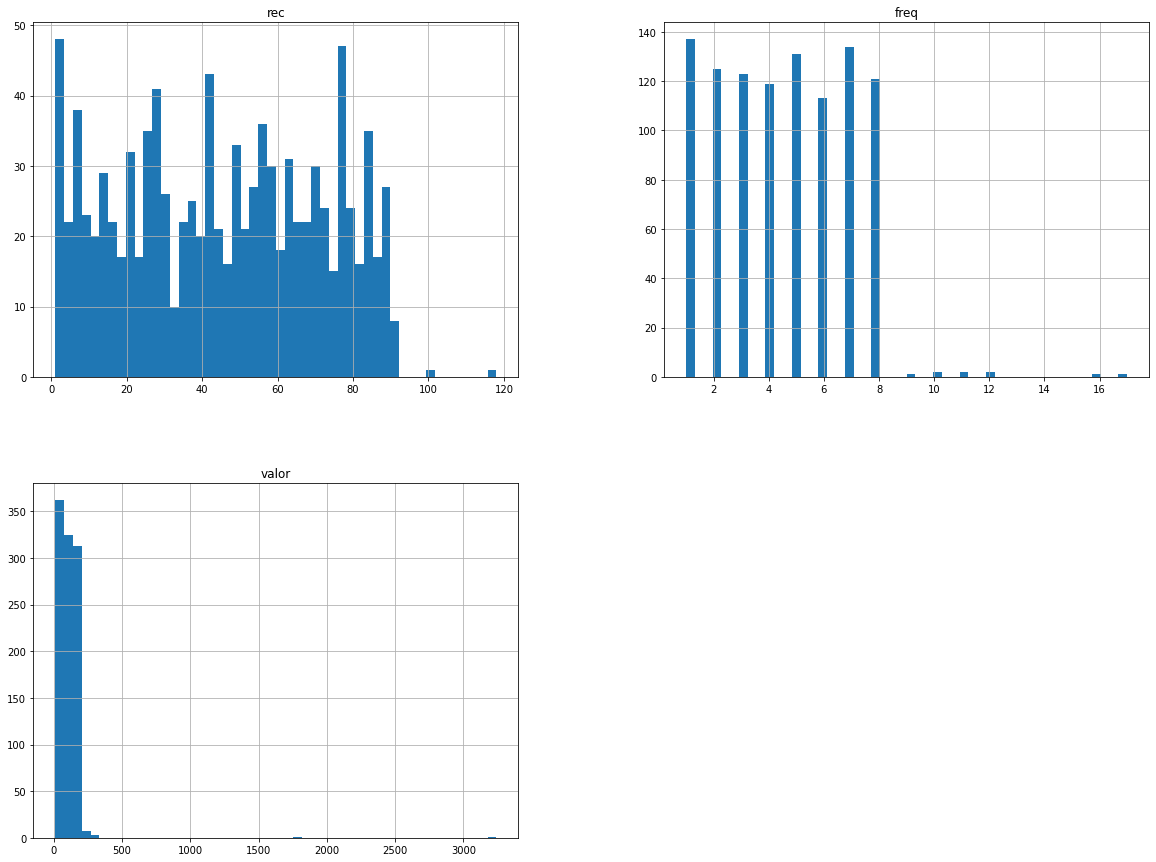

In [262]:
rfm = df.drop('user', axis=1).copy()

rfm.hist(bins=50, figsize=(20,15))
plt.show()

In [263]:
rfm['valor_cat'] = np.ceil(rfm['valor'] /50)
rfm['valor_cat'].where(rfm['valor_cat'] < 5, 5.0, inplace=True)

rfm['freq_cat'] = np.ceil(rfm['freq'] /1.5)
rfm['freq_cat'].where(rfm['freq_cat'] < 5, 5.0, inplace=True)

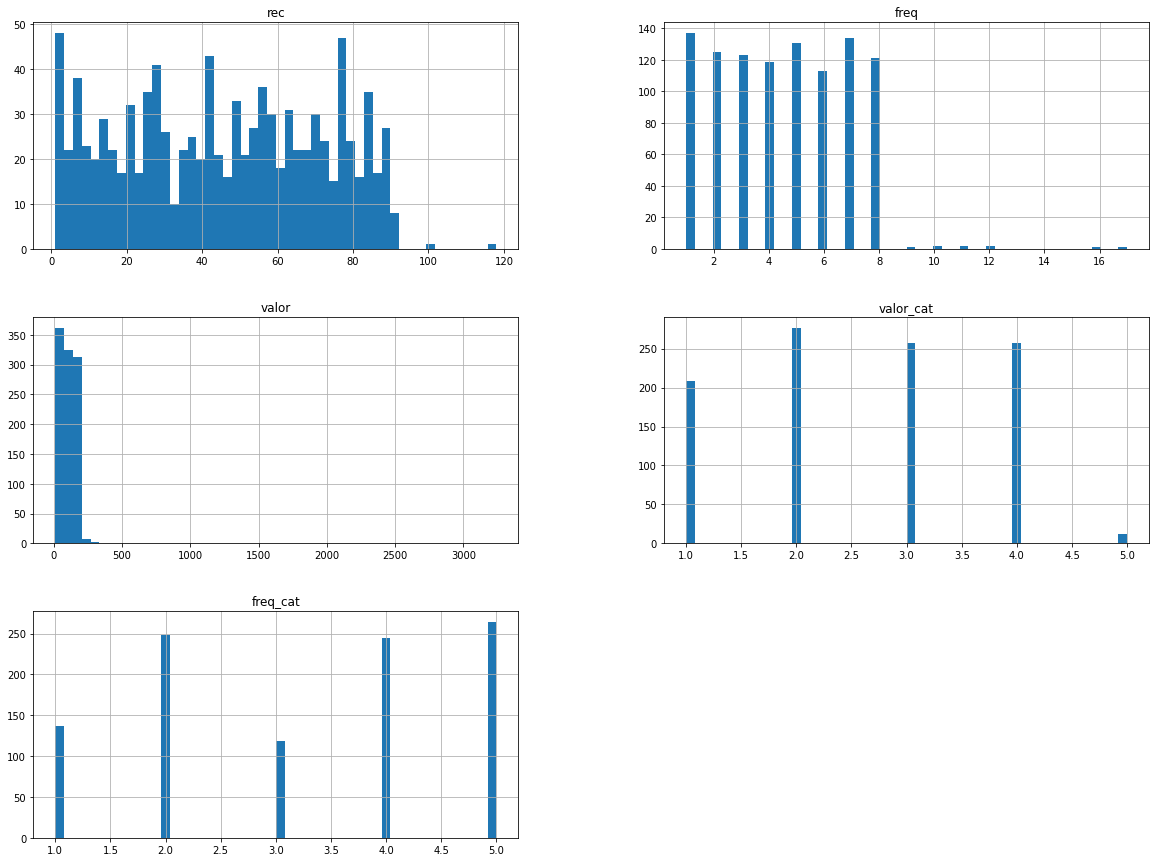

In [264]:
rfm.hist(bins=50, figsize=(20,15))
plt.show()

In [265]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [266]:
for train_index, test_index in split.split(rfm, rfm[['valor_cat', 'freq_cat']]):
  strat_train_set = rfm.loc[train_index]
  strat_test_set = rfm.loc[test_index]

In [267]:
strat_test_set['valor_cat'].value_counts() / len(strat_test_set), strat_test_set['freq_cat'].value_counts() / len(strat_test_set)

(2.0    0.275862
 3.0    0.256158
 4.0    0.251232
 1.0    0.206897
 5.0    0.009852
 Name: valor_cat, dtype: float64, 5.0    0.261084
 2.0    0.246305
 4.0    0.246305
 1.0    0.133005
 3.0    0.113300
 Name: freq_cat, dtype: float64)

In [268]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop(['valor_cat', 'freq_cat'], axis=1, inplace=True)

In [269]:
rfm = strat_train_set.copy()

In [270]:
rfm.corr()

,rec,freq,valor
rec,1.000000,-0.043395,0.102094
freq,-0.043395,1.000000,-0.068013
valor,0.102094,-0.068013,1.000000


In [271]:
rfm['valor_frequencia'] = rfm['valor'] / rfm['freq']
rfm['recencia_frequencia'] = rfm['rec'] / rfm['freq']
rfm['valor_recencia'] = rfm['valor'] / rfm['rec']
rfm['freq*val'] = rfm['freq'] * rfm['valor']

rfm

,rec,freq,valor,valor_frequencia,recencia_frequencia,valor_recencia,freq*val
909,25.0,1.0,112.968252,112.968252,25.000000,4.518730,112.968252
531,27.0,2.0,183.083404,91.541702,13.500000,6.780867,366.166808
888,57.0,7.0,40.893082,5.841869,8.142857,0.717422,286.251575
433,3.0,1.0,129.178408,129.178408,3.000000,43.059469,129.178408
120,72.0,8.0,121.749566,15.218696,9.000000,1.690966,973.996529
...,...,...,...,...,...,...,...
252,31.0,1.0,76.477245,76.477245,31.000000,2.467008,76.477245
690,1.0,3.0,160.024185,53.341395,0.333333,160.024185,480.072554
555,26.0,4.0,97.032566,24.258141,6.500000,3.732022,388.130263
923,49.0,1.0,14.160384,14.160384,49.000000,0.288987,14.160384


In [272]:
rfm.corr().sort_values('valor', ascending=False)

,rec,freq,valor,valor_frequencia,recencia_frequencia,valor_recencia,freq*val
valor,0.102094,-0.068013,1.000000,0.932314,0.246760,0.151552,0.474386
valor_frequencia,0.099248,-0.262971,0.932314,1.000000,0.403363,0.104612,0.170627
freq*val,-0.012926,0.626418,0.474386,0.170627,-0.271591,0.172583,1.000000
recencia_frequencia,0.538546,-0.601057,0.246760,0.403363,1.000000,-0.212055,-0.271591
valor_recencia,-0.434185,-0.030957,0.151552,0.104612,-0.212055,1.000000,0.172583
rec,1.000000,-0.043395,0.102094,0.099248,0.538546,-0.434185,-0.012926
freq,-0.043395,1.000000,-0.068013,-0.262971,-0.601057,-0.030957,0.626418


In [273]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(rfm.values)

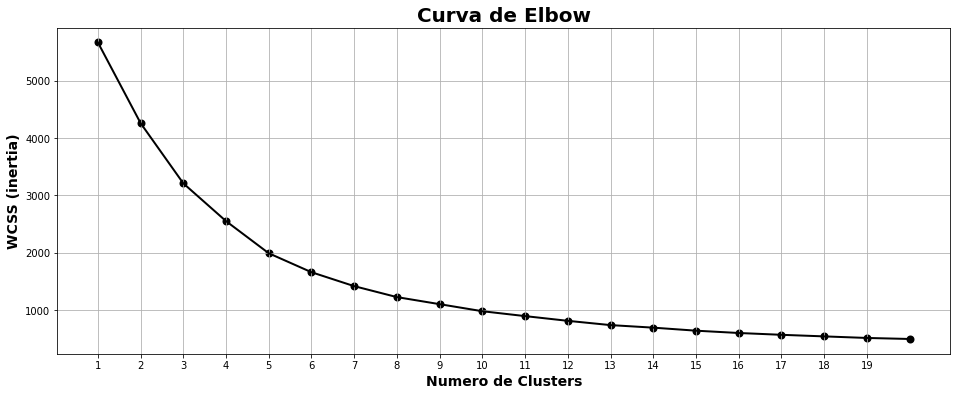

In [274]:
from sklearn.cluster import KMeans

l = []

for k in range(1, 21):
  km = KMeans(n_clusters=k)
  km.fit(X_norm)
  l.append(km.inertia_)

plt.figure(figsize=[16,6])
plt.title('Curva de Elbow', fontweight='bold', fontsize=20)
plt.xlabel('Numero de Clusters', fontweight='bold', fontsize=14)
plt.ylabel('WCSS (inertia)', fontweight='bold', fontsize=14)

plt.plot(range(1, 1+len(l)), l, c='black', lw=2)
plt.scatter(range(1, 1+len(l)), l, c='black', lw=2)

plt.xticks(range(1, len(l)))
plt.grid()
plt.show()


In [275]:
km = KMeans(n_clusters=4).fit(X_norm)
rfm_km = rfm.copy()
rfm_km['km3'] = km.predict(X_norm)

rfm_km



,rec,freq,valor,valor_frequencia,recencia_frequencia,valor_recencia,freq*val,km3
909,25.0,1.0,112.968252,112.968252,25.000000,4.518730,112.968252,1
531,27.0,2.0,183.083404,91.541702,13.500000,6.780867,366.166808,0
888,57.0,7.0,40.893082,5.841869,8.142857,0.717422,286.251575,0
433,3.0,1.0,129.178408,129.178408,3.000000,43.059469,129.178408,0
120,72.0,8.0,121.749566,15.218696,9.000000,1.690966,973.996529,0
...,...,...,...,...,...,...,...,...
252,31.0,1.0,76.477245,76.477245,31.000000,2.467008,76.477245,1
690,1.0,3.0,160.024185,53.341395,0.333333,160.024185,480.072554,2
555,26.0,4.0,97.032566,24.258141,6.500000,3.732022,388.130263,0
923,49.0,1.0,14.160384,14.160384,49.000000,0.288987,14.160384,1


In [291]:
for i in range(len(rfm_km.km3.unique())):
  print(f'Cluster {i}')
  print(rfm_km.loc[rfm_km.km3 == i].describe().mean().sort_values(ascending=False))
  print()

Cluster 0
freq*val               566.531167
valor                  151.964463
valor_frequencia       105.847537
rec                    103.867619
valor_recencia          78.144143
recencia_frequencia     76.201412
freq                    73.547495
km3                     69.375000
dtype: float64

Cluster 1
freq*val               226.715714
valor                  115.794190
valor_frequencia        91.113741
rec                     75.293188
recencia_frequencia     59.812602
valor_recencia          30.660834
freq                    29.884058
km3                     28.750000
dtype: float64

Cluster 2
freq*val               1186.102946
valor                   145.226344
valor_recencia           79.142153
valor_frequencia         59.507283
freq                      8.935276
rec                       5.855073
km3                       5.000000
recencia_frequencia       4.234999
dtype: float64

Cluster 3
freq*val               2012.445441
valor_frequencia       2012.445441
valor             

In [134]:
from sklearn.cluster import DBSCAN

In [277]:
clustering = DBSCAN(eps=5, min_samples=10).fit(X_norm)
db_cluster = clustering.fit_predict(X_norm)

In [278]:
np.unique(db_cluster)

array([-1,  0])

In [279]:
eps_params = [0.5, 0.9, 1.3, 1.6, 2, 3, 4]
min_samples =  [1, 2, 4, 5, 10, 50, 100]

for eps in eps_params:
  for min in min_samples:
    clustering = DBSCAN(eps=eps, min_samples=min).fit(X_norm)
    print(f'eps: {eps}, min_samples: {min}, result: {np.unique(clustering.fit_predict(X_norm))}')

eps: 0.5, min_samples: 1, result: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
eps: 0.5, min_samples: 2, result: [-1  0  1  2  3  4  5  6  7  8  9 10 11]
eps: 0.5, min_samples: 4, result: [-1  0  1  2  3]
eps: 0.5, min_samples: 5, result: [-1  0]
eps: 0.5, min_samples: 10, result: [-1  0  1  2  3  4  5  6  7]
eps: 0.5, min_samples: 50, result: [-1]
eps: 0.5, min_samples: 100, result: [-1]
eps: 0.9, min_samples: 1, result: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
eps: 0.9, min_samples: 2, result: [-1  0  1  2]
eps: 0.9, min_samples: 4, result: [-1  0  1]
eps: 0.9, min_samples: 5, result: [-1  0  1]
eps: 0.9, min_samples: 10, result: [-1  0]
eps: 0.9, min_samples: 50, result: [-1  0]
eps: 0.9, min_samples: 100, result: [-1]
eps: 1.3, min_samples: 1, result: [ 0  1  2  3  4  5  6  7  8  9 10 11]
eps: 1.3, min_samples: 2, result: [-1  0  1  2  

In [280]:
eps_params = [0.5, 0.9, 1.3, 1.6, 2, 3, 4]
min_samples =  [1]

for eps in eps_params:
  for min in min_samples:
    clustering = DBSCAN(eps=eps, min_samples=min).fit(X_norm)
    print(f'eps: {eps}, min_samples: {min}, result: {np.unique(clustering.fit_predict(X_norm))}')

eps: 0.5, min_samples: 1, result: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
eps: 0.9, min_samples: 1, result: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
eps: 1.3, min_samples: 1, result: [ 0  1  2  3  4  5  6  7  8  9 10 11]
eps: 1.6, min_samples: 1, result: [0 1 2 3 4 5 6 7]
eps: 2, min_samples: 1, result: [0 1 2 3 4 5 6]
eps: 3, min_samples: 1, result: [0 1 2]
eps: 4, min_samples: 1, result: [0 1 2]


In [281]:
clustering = DBSCAN(eps=3, min_samples=1).fit(X_norm)
clustering.fit_predict(X_norm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [287]:
rfm_dbscan = rfm.copy()
rfm_dbscan['db3_1'] = clustering.fit_predict(X_norm)

rfm_dbscan


,rec,freq,valor,valor_frequencia,recencia_frequencia,valor_recencia,freq*val,db3_1
909,25.0,1.0,112.968252,112.968252,25.000000,4.518730,112.968252,0
531,27.0,2.0,183.083404,91.541702,13.500000,6.780867,366.166808,0
888,57.0,7.0,40.893082,5.841869,8.142857,0.717422,286.251575,0
433,3.0,1.0,129.178408,129.178408,3.000000,43.059469,129.178408,0
120,72.0,8.0,121.749566,15.218696,9.000000,1.690966,973.996529,0
...,...,...,...,...,...,...,...,...
252,31.0,1.0,76.477245,76.477245,31.000000,2.467008,76.477245,0
690,1.0,3.0,160.024185,53.341395,0.333333,160.024185,480.072554,0
555,26.0,4.0,97.032566,24.258141,6.500000,3.732022,388.130263,0
923,49.0,1.0,14.160384,14.160384,49.000000,0.288987,14.160384,0


In [290]:
for i in range(len(rfm_dbscan.db3_1.unique())):
  print(f'Cluster {i}')
  print(rfm_dbscan.loc[rfm_dbscan.db3_1 == i].describe().mean().sort_values(ascending=False))
  print()

Cluster 0
freq*val               864.412227
valor                  198.837893
valor_frequencia       144.598181
rec                    138.368612
valor_recencia         128.872990
recencia_frequencia    120.398960
freq                   105.745429
db3_1                  100.875000
dtype: float64

Cluster 1
freq*val               1525.268526
valor_frequencia       1525.268526
valor                  1525.268526
recencia_frequencia     101.285714
rec                     101.285714
valor_recencia           13.067651
db3_1                     1.000000
freq                      1.000000
dtype: float64

Cluster 2
freq*val               2778.849245
valor_frequencia       2778.849245
valor                  2778.849245
recencia_frequencia      86.714286
rec                      86.714286
valor_recencia           27.654802
db3_1                     1.857143
freq                      1.000000
dtype: float64



###Conclusão:

Baseado nas análises e nas instâncias acima, o modelo DBScan não pareceu segmentar de forma satisfatória o conjunto de dados, portanto, o modelo que melhor segmenta os dados é o __KMeans__. 

A segmentação baseada no modelo KMeans descreve que o valor médio das compras entre os grupos é próxima, então a frequência (e a relação da mesma com a recência) em que os usuários compram é o fator de maior importância na segmentação dos mesmos. 

Baseado nos dados coletados, a segmentação se dá em 4 grupos distintos:

__grupo 0__(Cluster 3): Consumidores __esporádicos__ (que fizeram uma única compra de valor alto)<br>

__grupo 1__(Cluster 2): Consumidores __muito frequentes__ (__mais valiosos__)<br>
__grupo 2__(Cluster 1): Consumidores __frequentes__ (__padrao__)<br>
__grupo 3__(Cluster 0): Consumidores __pouco frequentes__ (__menos valiosos__)<br> 